In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#data cleaning
#STEP1-Detecting the NA Values
missing_value=["N/a",'na',np.nan]
data=pd.read_csv('train.csv',na_values=missing_value)

In [ ]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

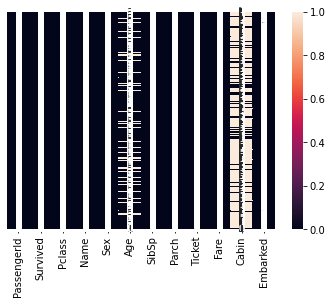

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,annot=True)

In [ ]:
#Step 2-Remove the values
data.dropna(how='all')
test.dropna(how='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#step 3 Filling in the values
data['Age'].fillna(data['Age'].median(),inplace=True)
test['Age'].fillna(test['Age'].median(),inplace=True)


In [ ]:
len(data['Cabin'].unique())

148

In [ ]:
data['Cabin'].fillna('U',inplace=True)
test['Cabin'].fillna('U',inplace=True)

In [ ]:
data.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U,S


In [ ]:
data['Embarked'].fillna('Unknown',inplace=True)
test['Embarked'].fillna('Unknown',inplace=True)

In [ ]:
test['Fare'].fillna(test['Fare'].median(),inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data['Survived'].value_counts(normalize=True)


0    0.616162
1    0.383838
Name: Survived, dtype: float64

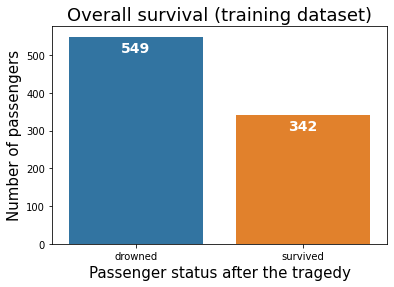

In [ ]:
sns.countplot(x='Survived',data=data)
plt.xticks( np.arange(2), ['drowned', 'survived'] )
plt.title('Overall survival (training dataset)',fontsize= 18)
# set x label
plt.xlabel('Passenger status after the tragedy',fontsize = 15)
# set y label
plt.ylabel('Number of passengers',fontsize = 15)
labels = (data['Survived'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

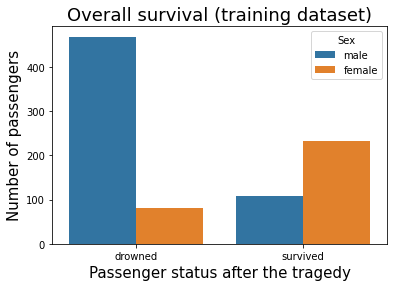

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=data)
plt.xticks( np.arange(2), ['drowned', 'survived'] )
plt.title('Overall survival (training dataset)',fontsize= 18)
# set x label
plt.xlabel('Passenger status after the tragedy',fontsize = 15)
# set y label
plt.ylabel('Number of passengers',fontsize = 15)
labels = (data['Survived'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

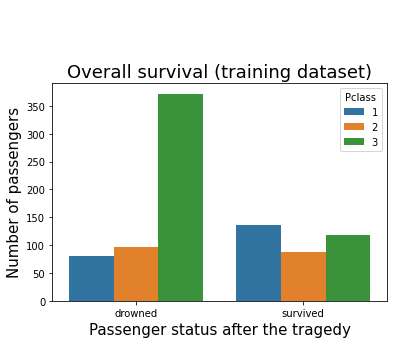

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=data)
plt.xticks( np.arange(2), ['drowned', 'survived'] )
plt.title('Overall survival (training dataset)',fontsize= 18)
# set x label
plt.xlabel('Passenger status after the tragedy',fontsize = 15)
# set y label
plt.ylabel('Number of passengers',fontsize = 15)
labels = (data['Survived'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

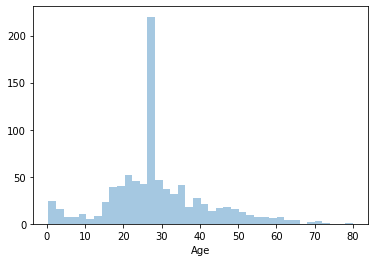

In [ ]:
sns.distplot(data['Age'],kde=False,bins=40)

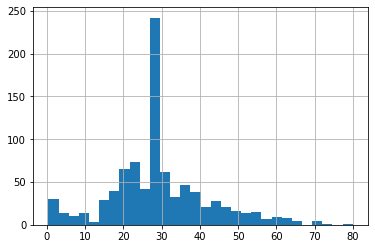

In [ ]:
data['Age'].hist(bins=30)

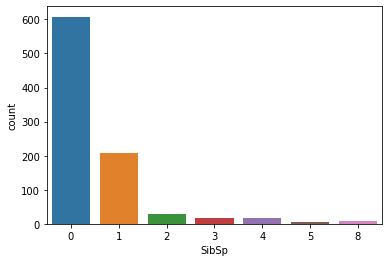

In [ ]:

sns.countplot(x='SibSp',data=data)
plt.show()

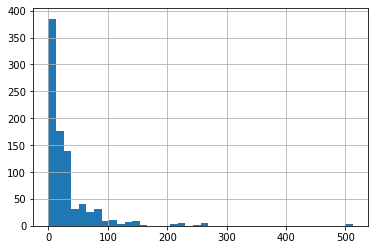

In [ ]:
data['Fare'].hist(bins=40)

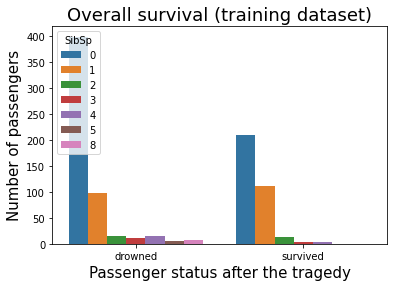

In [ ]:
sns.countplot(x='Survived',hue='SibSp',data=data)
plt.xticks( np.arange(2), ['drowned', 'survived'] )
plt.title('Overall survival (training dataset)',fontsize= 18)
# set x label
plt.xlabel('Passenger status after the tragedy',fontsize = 15)
# set y label
plt.ylabel('Number of passengers',fontsize = 15)
labels = (data['Survived'].value_counts()) 
plt.show()

In [ ]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
embark=pd.get_dummies(data['Embarked'],drop_first=True)

In [ ]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
data=pd.concat([data,sex,embark],axis=1)
test=pd.concat([test,sex,embark],axis=1)

In [ ]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,Unknown
0,892.0,3.0,34.5,0.0,0.0,7.8292,U,1,0,1,0
1,893.0,3.0,47.0,1.0,0.0,7.0000,U,0,0,0,0
2,894.0,2.0,62.0,0.0,0.0,9.6875,U,0,0,1,0
3,895.0,3.0,27.0,0.0,0.0,8.6625,U,0,0,1,0
4,896.0,3.0,22.0,1.0,1.0,12.2875,U,1,0,1,0


In [ ]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,Unknown
0,1,0,3,22.0,1,0,7.2500,U,1,0,1,0
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,U,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,U,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,U,1,0,1,0
887,888,1,1,19.0,0,0,30.0000,B42,0,0,1,0
888,889,0,3,28.0,1,2,23.4500,U,0,0,1,0
889,890,1,1,26.0,0,0,30.0000,C148,1,0,0,0


In [ ]:
data['Cabin'].unique()

array(['U', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
data['Deck']=data['Cabin'].str[:1]
test['deck']=test['Cabin'].str[:1]

In [ ]:
test['deck'].unique()

array(['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G', nan], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

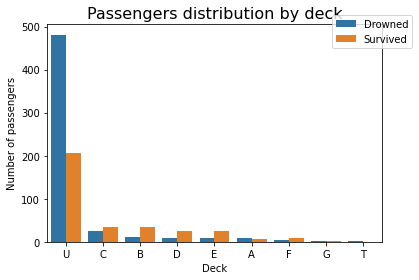

In [ ]:
sns.countplot(x=data['Deck'],data=data,hue='Survived',order = data['Deck'].value_counts().index)
plt.title('Passengers distribution by deck',fontsize= 16)
plt.ylabel('Number of passengers')
plt.legend(( 'Drowned', 'Survived'), loc=(0.85,0.89))
plt.xticks(rotation = False)

In [ ]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}

In [ ]:
data['deck']=data['deck'].map(cabin_category)
test['deck']=test['deck'].map(cabin_category)

KeyError: ignored

In [ ]:
bins = [-1, 0, 18, 25, 35, 60, np.inf]
labels = ['Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

In [ ]:
data['AgeGroup'] = pd.cut(data["Age"], bins, labels = labels)
test['AgeGroup']=pd.cut(test['Age'],bins,labels=labels)

In [ ]:
age_mapping = {'Unknown': None,'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
data['AgeGroup'] = data['AgeGroup'].map(age_mapping)
test['AgeGroup']=test['AgeGroup'].map(age_mapping)

In [ ]:
test1=test.iloc[0:418,:]

In [ ]:
test1

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,Unknown,deck,AgeGroup
0,892.0,3.0,34.5,0.0,0.0,7.8292,U,1,0,1,0,9.0,3.0
1,893.0,3.0,47.0,1.0,0.0,7.0000,U,0,0,0,0,9.0,4.0
2,894.0,2.0,62.0,0.0,0.0,9.6875,U,0,0,1,0,9.0,5.0
3,895.0,3.0,27.0,0.0,0.0,8.6625,U,0,0,1,0,9.0,3.0
4,896.0,3.0,22.0,1.0,1.0,12.2875,U,1,0,1,0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305.0,3.0,27.0,0.0,0.0,8.0500,U,1,0,1,0,9.0,3.0
414,1306.0,1.0,39.0,0.0,0.0,108.9000,C105,1,0,1,0,3.0,4.0
415,1307.0,3.0,38.5,0.0,0.0,7.2500,U,0,0,1,0,9.0,4.0
416,1308.0,3.0,27.0,0.0,0.0,8.0500,U,0,0,1,0,9.0,3.0


In [ ]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,Unknown,deck,AgeGroup
0,892.0,3.0,34.5,0.0,0.0,7.8292,U,1,0,1,0,9.0,3.0
1,893.0,3.0,47.0,1.0,0.0,7.0000,U,0,0,0,0,9.0,4.0
2,894.0,2.0,62.0,0.0,0.0,9.6875,U,0,0,1,0,9.0,5.0
3,895.0,3.0,27.0,0.0,0.0,8.6625,U,0,0,1,0,9.0,3.0
4,896.0,3.0,22.0,1.0,1.0,12.2875,U,1,0,1,0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,NaN,NaN
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,NaN,NaN


In [ ]:
X1.shape

(418, 10)

In [ ]:
X=data.drop(['Cabin','Age','PassengerId','Survived'],axis=1)
X1=test1.drop(['Cabin','Age','PassengerId',],axis=1)

In [ ]:
X.shape


(891, 10)

In [ ]:
y=data.iloc[:,1]

In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
X_test

,Survived,Pclass,SibSp,Parch,Fare,male,Q,S,Unknown,Deck,AgeGroup
745,0,1,1,1,71.0000,1,0,1,0,2,5.0
333,0,3,2,0,18.0000,1,0,1,0,9,1.0
151,1,1,1,0,66.6000,0,0,1,0,3,2.0
208,1,3,0,0,7.7500,0,1,0,0,9,1.0
367,1,3,0,0,7.2292,0,0,0,0,9,3.0
...,...,...,...,...,...,...,...,...,...,...,...
879,1,1,0,1,83.1583,0,0,0,0,3,4.0
196,0,3,0,0,7.7500,1,1,0,0,9,3.0
87,0,3,0,0,8.0500,1,0,1,0,9,3.0
681,1,1,0,0,76.7292,1,0,0,0,4,3.0


In [ ]:
print(X1)

     Pclass  SibSp  Parch      Fare  male  Q  S  Unknown  deck  AgeGroup
0       3.0    0.0    0.0    7.8292     1  0  1        0   9.0       3.0
1       3.0    1.0    0.0    7.0000     0  0  0        0   9.0       4.0
2       2.0    0.0    0.0    9.6875     0  0  1        0   9.0       5.0
3       3.0    0.0    0.0    8.6625     0  0  1        0   9.0       3.0
4       3.0    1.0    1.0   12.2875     1  0  1        0   9.0       2.0
..      ...    ...    ...       ...   ... .. ..      ...   ...       ...
413     3.0    0.0    0.0    8.0500     1  0  1        0   9.0       3.0
414     1.0    0.0    0.0  108.9000     1  0  1        0   3.0       4.0
415     3.0    0.0    0.0    7.2500     0  0  1        0   9.0       4.0
416     3.0    0.0    0.0    8.0500     0  0  1        0   9.0       3.0
417     3.0    1.0    1.0   22.3583     0  0  1        0   9.0       3.0

[418 rows x 10 columns]


In [ ]:
#Model Building
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
#test Models:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
y1_predict=random_forest.predict(X1)
random_forest.score(X, y)


0.9506172839506173

In [ ]:
score=cross_val_score(random_forest,X,y,cv=10)
score.mean()

0.8136704119850187

In [ ]:
#Logistcic Regression:
logistic_regressor=LogisticRegression(max_iter=400)
logistic_regressor.fit(X,y)
y2_predict=logistic_regressor.predict(X1)
logistic_regressor.score(X,y)

0.8047138047138047

In [ ]:
score2=cross_val_score(logistic_regressor,X,y,cv=10)
score2.mean()

0.7979650436953808

In [ ]:
#XGB CLASSIFIER
xgb_clas=XGBClassifier()
x_train=X.values
y_train=y.values
xgb_clas.fit(x_train,y_train)
xgb_clas.score(x_train,y_train)

0.8664421997755332

In [ ]:
score3=cross_val_score(xgb_clas,x_train,y_train,cv=10)
score3.mean()

0.8159925093632958

In [ ]:
X_test=X1.values
y3_predict=xgb_clas.predict(X_test)


In [ ]:
#SVM

clf=SVC(kernel='linear')
clf.fit(X,y)
clf.score(X,y)

0.7867564534231201

In [ ]:
randomForestFinalModel = RandomForestClassifier(random_state = 2, bootstrap=False,min_samples_split=2,min_samples_leaf= 5, criterion = 'entropy', max_depth = 13, max_features = 'sqrt', n_estimators = 200)

In [ ]:
randomForestFinalModel.fit(X, y)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=13, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [ ]:
predictions_rf = randomForestFinalModel.predict(X1)

In [ ]:
submit_test2=pd.concat([test1["PassengerId"].astype(int),pd.DataFrame(y3_predict).astype(int)],axis=1)

In [ ]:
submit_test2.columns=['PassengerId','Survived']

In [ ]:
submit_test2

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [ ]:
submit_test2.to_csv('Sample_submission2.csv',index=False)

NameError: ignored

In [ ]:
print(acc)

In [ ]:
submission = pd.DataFrame({
    "PassengerId": test1["PassengerId"].astype(int),
    "Survived": predict
})

In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [ ]:
submission.to_csv("titanic.csv",index=False)

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='titanic.csv')  
submission.to_csv('titanic.zip', index=False,
          compression=compression_opts)  

SyntaxError: ignored

In [ ]:
df['PID']=df['PassengerId'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    float64
 1   Survived     418 non-null    int64  
 2   PID          418 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 9.9 KB


In [ ]:
df['survived']=df['Survived']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    float64
 1   Survived     418 non-null    int64  
 2   PID          418 non-null    int64  
 3   survived     418 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 13.2 KB


In [ ]:
df=df.drop(['PassengerId','Survived'],axis=1,inplace=True)

In [ ]:
print(df)

None


In [ ]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,Unknown,deck,AgeGroup
0,892.0,3.0,34.5,0.0,0.0,7.8292,U,1,0,1,0,9.0,3.0
1,893.0,3.0,47.0,1.0,0.0,7.0000,U,0,0,0,0,9.0,4.0
2,894.0,2.0,62.0,0.0,0.0,9.6875,U,0,0,1,0,9.0,5.0
3,895.0,3.0,27.0,0.0,0.0,8.6625,U,0,0,1,0,9.0,3.0
4,896.0,3.0,22.0,1.0,1.0,12.2875,U,1,0,1,0,9.0,2.0


In [ ]:
test.shape

(891, 13)

In [ ]:
data.shape

(891, 14)